In [71]:
## introduction to dataframes and pandas
import pandas as pd

df = pd.read_excel('/home/ilia/PycharmProjects/rbd_hw/data.xls')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [59]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [60]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.435701,0.540740,0.510917
sepal_width,0.435701,1.000000,0.241140,0.399530
petal_length,0.540740,0.241140,1.000000,0.837498
petal_width,0.510917,0.399530,0.837498,1.000000


<AxesSubplot:>

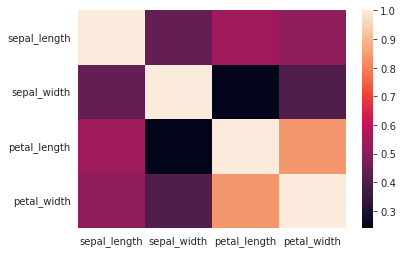

In [61]:
import seaborn as sns

sns.heatmap(df.corr())
# За дослідженням кореляції набільші залежності це petal_length від petal_width та навпаки. А
# також +- непоганий результат petal_length від sepal_length та навпаки

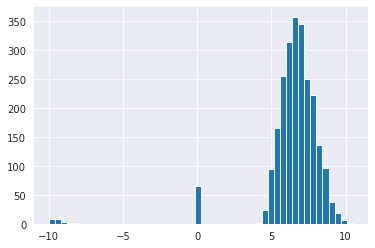

In [62]:
import matplotlib.pyplot as plt #Тип візуалізації я обрав діаграмму частот, тому що у наступному
# завданні нам потрібно зрозуміти дані нормально розподілені чи ні

plt.hist(df['sepal_length'], bins=50, label='Sepal length')
plt.show() #в колонці sepal_length розподіл виглядає більш менш нормально, але у нас присутні
# аномальні дані, які трішки портять картину. тому що ми не робили ніякий препроцесінг. 
# Тому щоб зробити тут розподіл нормальним, нам потрібно запроцесити аномальні данні. В нашому
# випадку це нулі і від'ємні значення- і їх потрібно або викинути або замінити

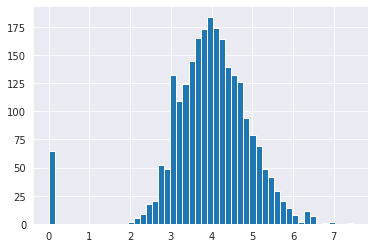

In [63]:
plt.hist(df['sepal_width'], bins=50, label='Sepal width')
plt.show() #в колонці sepal_width дуже схожа ситуація з sepal_length, але без від'ємних значень і
# розподіл також виглядає нормальним. Тому я би тут також викинув нулі або замінив і розподіл
# наблизився би до нормального. Але мене трішки бентежить значення 3 з чимось,

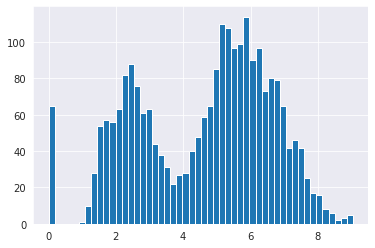

In [64]:
plt.hist(df['petal_length'], bins=50, label='Petal length')
plt.show() #в колонці petal_length явно видно не нормальний розподіл

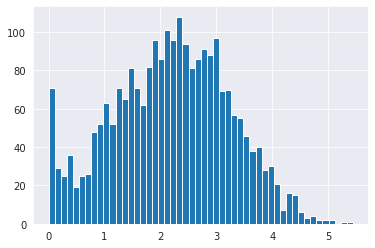

In [28]:
plt.hist(df['petal_width'], bins=50, label='Petal width')
plt.show()
#в колонці petal_width якщо б не нулі, то він би наближався до нормального. Проте в будь кому
# випадку у нас є достатньо велике скупчення данних в діапазоні між 0 та 1. Але припущу що він
# нормальний, буду радий почути фідбек))

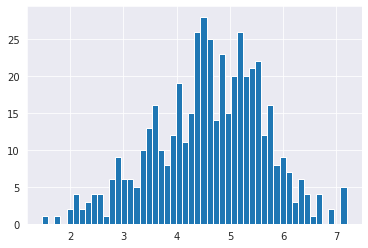

In [65]:
#приклад як ми можемо прийти до нормального +- розподілу по колонці petal_length. У кожних 5 взяти
# середнє та побудвати гістограму по масиву цих середнів. Але можливо так не можна робити, тому що
# ми таким чином зменшуємо кількість даних. В такому випадку можливо на поміч прийде логарифмування
averages = []
step = 5

# Проходження по колонці та обчислення середнього значення кожних 5 елементів
for i in range(0, len(df['petal_length']), step):
    subset = df['petal_length'].iloc[i:i+step]
    avg = subset.mean()
    averages.append(avg)

plt.hist(averages, bins=50)
plt.show()

In [33]:
# Я би хотів впевнитись в своїх візуальних висновках стосовно розподілу кожної з колонок та
# застосувати метод шапіро. Але перед цим потрібно почистити наші дані від пропусків та нулів.

# Тому перевіряємо наші пропуски і бачимо шо майже всі атрибути пропущені і цих записів не дуже
# багато на фоні генеральної сукупності, тому дропнемо їх.
df[df.isnull().any(axis=1)] 

,sepal_length,sepal_width,petal_length,petal_width,species
17,NaN,NaN,NaN,NaN,Iris-setosa
50,NaN,NaN,NaN,NaN,Iris-virginica
293,NaN,NaN,NaN,NaN,Iris-setosa
302,NaN,NaN,NaN,NaN,Iris-virginica
318,NaN,NaN,NaN,NaN,Iris-setosa
1179,NaN,NaN,NaN,NaN,Iris-virginica
1792,NaN,NaN,NaN,NaN,Iris-setosa
1808,NaN,NaN,NaN,NaN,Iris-setosa
1817,NaN,NaN,NaN,NaN,Iris-virginica


In [72]:
df = df.dropna()
df = df.reset_index(drop=True)

zero_records = df[(df['sepal_length'] == 0) & (df['sepal_width'] == 0) & (df['petal_length'] == 0) & (df['petal_width'] == 0)]

df = df.drop(zero_records.index)

df = df.reset_index(drop=True)


In [73]:
df[df.isnull().any(axis=1)] 

,sepal_length,sepal_width,petal_length,petal_width,species


In [69]:
# Тепер ми вже навчені)) поділимо датасет на типи ірисів, та в кожному заповнимо негативні
# значення та 0 середнім наприклад
import numpy as np

np.unique(df.species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-whatever'], dtype=object)

In [77]:
df_setosa = df[df['species'] == 'Iris-setosa']
df_setosa.describe() #бачимо що аномальні данні лишились тільки в колонці sepal length, тому
# замінимо його на середнє

,sepal_length,sepal_width,petal_length,petal_width
count,766.000000,766.000000,766.000000,766.000000
mean,5.839830,4.419491,2.454582,1.321932
std,1.551424,0.758417,0.661755,0.691136
min,-10.000000,2.300000,1.000000,0.100000
25%,5.420000,3.870000,1.952500,0.840000
50%,5.910000,4.370000,2.430000,1.255000
75%,6.420000,4.905000,2.907500,1.820000
max,8.810000,7.470000,4.620000,3.580000


In [83]:
df.loc[df_setosa[df_setosa['sepal_length'] < 0].index, 'sepal_length'] = df_setosa.sepal_length.mean()
df[df['species'] == 'Iris-setosa'].describe()


,sepal_length,sepal_width,petal_length,petal_width
count,766.000000,766.000000,766.000000,766.000000
mean,5.960364,4.419491,2.454582,1.321932
std,0.731095,0.758417,0.661755,0.691136
min,4.300000,2.300000,1.000000,0.100000
25%,5.440000,3.870000,1.952500,0.840000
50%,5.910000,4.370000,2.430000,1.255000
75%,6.420000,4.905000,2.907500,1.820000
max,8.810000,7.470000,4.620000,3.580000


In [86]:
#Проробимо теж саме для інших видів ірисів
df_versicolor = df[df['species'] == 'Iris-versicolor']
df.loc[df_versicolor[df_versicolor['sepal_length'] < 0].index, 'sepal_length'] = df_versicolor.sepal_length.mean()
df[df['species'] == 'Iris-versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,784.000000,784.000000,784.000000,784.000000
mean,6.897138,3.753240,5.192054,2.351084
std,0.839740,0.696777,0.744771,0.687459
min,4.900000,2.000000,3.000000,1.000000
25%,6.307500,3.240000,4.700000,1.857500
50%,6.830000,3.730000,5.170000,2.280000
75%,7.442500,4.220000,5.672500,2.840000
max,9.730000,5.960000,7.450000,5.250000


In [88]:
df_virginica = df[df['species'] == 'Iris-virginica']
df.loc[df_virginica[df_virginica['sepal_length'] < 0].index, 'sepal_length'] = df_virginica.sepal_length.mean()
df[df['species'] == 'Iris-virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,776.000000,776.000000,776.000000,776.000000
mean,7.518214,4.040374,6.535928,3.051121
std,0.884910,0.772139,0.819608,0.694926
min,4.900000,2.200000,4.500000,1.400000
25%,6.890000,3.470000,5.940000,2.530000
50%,7.490000,3.980000,6.500000,3.000000
75%,8.120000,4.530000,7.072500,3.502500
max,10.490000,6.940000,9.040000,5.440000


In [97]:
df_whatever = df[df['species'] == 'Iris-whatever']
df.loc[df_whatever[df_whatever['sepal_length'] < 0].index, 'sepal_length'] = df_whatever.sepal_length.mean()
df[df['species'] == 'Iris-whatever'].describe()
#Дуже цікавий дескрайб по цьому виду ірисів. Тому що майже по всім квартилям значення наближаються до однакових.

,sepal_length,sepal_width,petal_length,petal_width
count,24.000000,24.000000,24.000000,24.000000
mean,7.223750,4.531250,5.299167,2.697083
std,0.809051,0.812577,2.518564,1.403382
min,5.800000,3.120000,1.200000,0.200000
25%,6.592500,4.075000,2.590000,1.110000
50%,7.250000,4.480000,6.565000,3.305000
75%,7.850000,5.080000,7.320000,3.697500
max,8.830000,6.310000,8.230000,4.520000


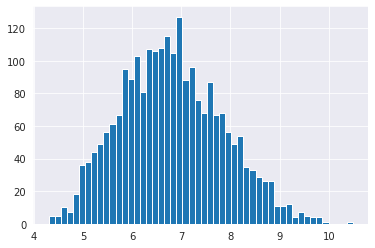

In [103]:
#Візуалізуємо знову наші колнки та перевіримо тестом шапіро

plt.hist(df['sepal_length'], bins=50, label='Sepal length')
plt.show()

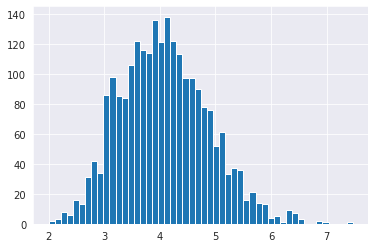

In [104]:
plt.hist(df['sepal_width'], bins=50, label='Sepal width')
plt.show() # Тепер розподіли по Sepal length та Sepal width схожі на нормальні

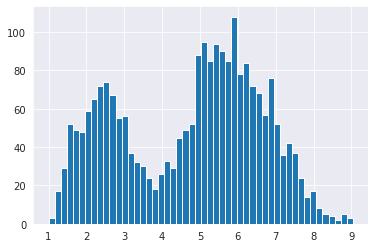

In [105]:
plt.hist(df['petal_length'], bins=50, label='Petal length')
plt.show()  # Тут ситуація така ж, розподіл не нормальний. Але тут і проблема була не в пропусках
# нулях або негативних значеннях. Цей розподіл просто не нормальний

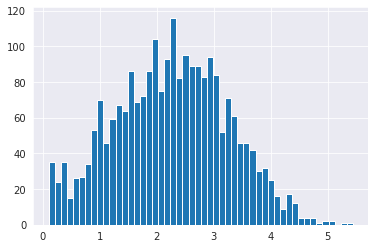

In [106]:
plt.hist(df['petal_width'], bins=50, label='Petal width')
plt.show() # і тут розподіл також не нормальний

In [108]:
# Перевіримо методом шапіро

import  scipy 

scipy.stats.shapiro(df['sepal_length'])


# Якщо статистика близька до 1, це свідчить про те, що розподіл є близьким до нормального. У нашому випадку, статистика дорівнює близько 0.993, що вказує на те, що розподіл може бути близьким до нормального.
# 
# Зазвичай, якщо p-значення менше за обране значення альфа (зазвичай 0.05), то ми відкидаємо нульову гіпотезу. У нашому випадку p-значення набагато менше за 0.05 (3.2930012050513824e-09), що свідчить про те, що розподіл статистично значимо відрізняється від нормального розподілу.
# 
# Отже, на основі результату, можна вважати, що дані по колонці sepal_length не мають нормального розподілу.
#Хоча вони наближаються до нормального що прослідковувалось візуально

ShapiroResult(statistic=0.9929700493812561, pvalue=3.2930012050513824e-09)

In [109]:
# Перевіримо інші колонки 
scipy.stats.shapiro(df['sepal_width'])

ShapiroResult(statistic=0.9918506741523743, pvalue=3.2214167444699626e-10)

In [110]:
scipy.stats.shapiro(df['petal_length'])

ShapiroResult(statistic=0.9529969692230225, pvalue=7.611446933169395e-27)

In [112]:
scipy.stats.shapiro(df['petal_width'])

ShapiroResult(statistic=0.9937351942062378, pvalue=1.8321307138080556e-08)

In [ ]:
#Отже можемо підтвердити те що, жодна з колонок не має нормального розподілу і більш за всіх
# відхиляються це petal_length. Менше всіх petal_width через те що в неї найвище p-значення, хоча
# візуально більш нормальними виглядали колонки по sepal